# Rayleigh-Ritz

Example from 2.4 of Reddy 

$$
-\frac{d^2\,u}{d\,x^2} - u + x^2 = 0,\quad 0 < x < 1
$$

$$
u(0) = u(1) = 0
$$


In [12]:
import numpy as np

from numpy import sin
from scipy.integrate import quad
from matplotlib import pyplot as plt

In [13]:
# Relate Given Problem To Generalised Case

a =  1
c = -1

q = lambda x : -np.power(x, 2)

In [14]:
# Analytical Solution
def f(x):
    return (sin(x) + 2 * sin(1 - x)) / sin(1) + (x**2) - 2 

In [15]:
# E Quadratic Elements
E = 100
# N Nodes
N = 2*E + 1

In [16]:
# Local Eelement Domain Length 1
he = 1 / E

In [17]:
# Element Coefficient Matrix
Ke = ((a / (3*he))  * np.array([[7, -8,  1], [-8, 16, -8], [ 1, -8, 7]]) 
   +  (c * he / 30) * np.array([[4,  2, -1], [ 2, 16,  2], [-1,  2, 4]]) 
)


In [18]:
# # Element Source Vector (Numerical)
# def Fe(i, j):

#     # Integral Bounds
#     xa, xb = i * he, j * he

#     fe_1 = lambda x : ((xb - x) / (xb - xa)) * q(x)
#     fe_2 = lambda x : ((x - xa) / (xb - xa)) * q(x)

#     return np.array([quad(fe_1, xa, xb)[0], quad(fe_2, xa, xb)[0]])

In [19]:
# Element Source Vector
def Fe(i, j):

    # Integral Bounds
    xa, xb = i * he, j * he

    fe_1 = (-1/12) * (xb-xa) * ((3 * xa**2) + (2 * xa * xb) + (    xb**2))
    fe_2 = (-1/12) * (xb-xa) * ((    xa**2) + (2 * xa * xb) + (3 * xb**2))

    return np.array([fe_1, fe_2])

In [20]:
# Connectivity Matrix
B = (np.array(np.arange(0, E, 1)) + np.array([0,1,2])[:, np.newaxis]).T

In [21]:
# Construct Nodal Solution
K = np.zeros((N, N))
F = np.zeros((N,))
U = np.full ((N,), np.nan)

In [22]:
# Fill Nodal and Primary Variable Coeficient Matrix
for (i,j) in B:
    F[i:j+1:j-i] += Fe(i,j)
    K[i:j+1:j-i, i:j+1:j-i] += Ke

ValueError: too many values to unpack (expected 2)

In [ ]:
# Apply Boundary Conditions 
U[[0,-1]] = -0 

In [ ]:
# Identify known primary variabes
m = ~np.isnan(U)

In [ ]:
# Solve 
U[~m] = np.matmul(
    np.linalg.inv(K[np.ix_(~m, ~m)]),
    F[~m] - np.matmul(K[np.ix_(~m, m)], U[m])
)

LinAlgError: Singular matrix

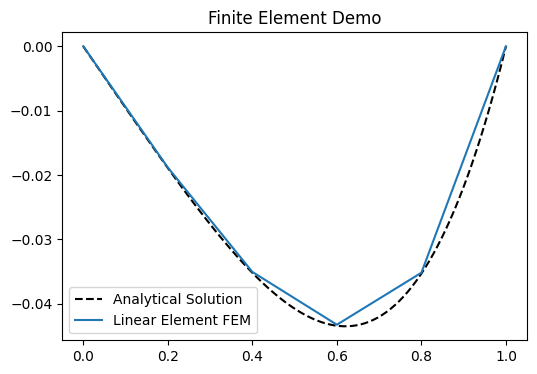

In [ ]:
x = np.linspace(0, 1, 100)

fig = plt.figure(figsize = (6,4))
plt.title("Finite Element Demo")
plt.plot(x, f(x), '--k', label="Analytical Solution")
plt.plot([he * i for i in range(len(U))], U, label='Linear Element FEM')
plt.legend()
plt.show()